<a href="https://colab.research.google.com/github/SaswatD27/CS460-NISER-Fall-Semester-2021-22/blob/main/CS460_WineQuality_SD_final_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import random
from matplotlib import pyplot as plt
import pandas
import math

In [ ]:
db=np.genfromtxt('winequality-red.csv',delimiter=',')
db=db[1:]

In [ ]:
X=[x[:-1] for x in db]
y=[x[-1] for x in db]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Read from below

## From Scratch

##9.a Linear Regression Code

## 9.a

In [ ]:
def SGD_SD(x,y,alpha=0.000005,epochs=1000):#alpha=0.000012658 is fairly good #epochs=1000000 works well
  w=np.ones(len(x[0])+1)
  #b=1
  flag=0
  delw=np.zeros(len(w))
  n_iter=0
  n=len(x)
  while n_iter<epochs:
    """
    for i in range(n):
      delw+=x[i]*((w*x[i]+b)-y[i])
      delb+=((w*x[i]+b)-y[i])
    delw*=(2/n)
    delb*=(2/n)
    """
    for i in range(n):
      j = random.randint(0, n - 1)
      X=list(x[j])
      X.insert(0,1)
      X=np.array(X)
      delw=2*(X*(np.dot(w,X)-y[j]))
      #delb=2*(np.dot(w,x[i])-y[i])
      w-=alpha*delw
      #b-=alpha*delb
    n_iter+=1
    #i=n_iter%len(x)
    #print(i," done.", w)
  return w#b

In [ ]:
alp=1/(314*250)
m=SGD_SD(X_train,y_train,alpha=alp,epochs=500) #runs SGD
print(loss(X_train,y_train))

929.5019127641159


In [ ]:
alp=1/(314*250) #varies the number of epochs and reports corresponding loss for each number chosen
#ep=[200, 350, 500, 750, 1000]
ep=[50,100,150,200,250]
for epoch in ep:
  m=SGD_SD(X_train,y_train,alpha=alp,epochs=epoch)
  print(loss(X_train,y_train))

831.0330168703924
2054.604111656549
1029.9183673883647
836.3574294433404
872.8193393211251


Loss decreases with increase in number of epochs, usually but as outputs are discrete, this is not a good reflection. Some now omitted code reported a 57.083% accuracy in exact, nearest integer prediction, and 96.67% accuracy with an error of $\pm 1$, so it predicts wine quality pretty closely.

### 9.b L1
This takes cost function as
$$\text{Cost=}\frac 1 N\sum_{i=1}^N(y_p^{(i)}-y_a^{(i)})^2+c|w|$$

Penalises weights while gradient descent, tends towards nullifying insignificant weights. Reduces overfitting.

Bias-variance tradeoff: Variance reduces, so bias increases. Variance reduces as low impact features are penalised, preventing overfitting.

Bias increases as some features are nullified or have their impact reduced, leading to underfitting/high bias in some cases (assumes that those features are not important.)

In [ ]:
#L1
def SGD_SD_L1(x,y,alpha=0.000005,epochs=1000,c=0.5):#alpha=0.000012658 is fairly good #epochs=1000000 works well
  w=np.ones(len(x[0])+1)
  #b=1
  flag=0
  delw=np.zeros(len(w))
  n_iter=0
  n=len(x)
  while n_iter<epochs:
    """
    for i in range(n):
      delw+=x[i]*((w*x[i]+b)-y[i])
      delb+=((w*x[i]+b)-y[i])
    delw*=(2/n)
    delb*=(2/n)
    """
    for i in range(n):
      j = random.randint(0, n - 1)
      X=list(x[j])
      X.insert(0,1)
      X=np.array(X)
      w1=np.array([abs(a) for a in w])
      delw=2*(X*(np.dot(w,X)-y[j]))+c*w1/w
      #delb=2*(np.dot(w,x[i])-y[i])
      w-=alpha*delw
      #b-=alpha*delb
    n_iter+=1
    #i=n_iter%len(x)
    #print(i," done.", w)
  return w#b

In [ ]:
#Runs LR with SGD with L1 regularisation
alp=1/(314*250)
m=SGD_SD_L1(X_train,y_train,alpha=alp,epochs=1000,c=0.5)
print(loss(X_train,y_train))

977.4856380455592


## 9.c L2

This takes cost function as
$$\text{Cost=}\frac 1 N\sum_{i=1}^N(y_p^{(i)}-y_a^{(i)})^2+c\Vert w\Vert^2$$

Penalises weights while gradient descent, but does not nullify them. Reduces overfitting. Better performance than L1.

Bias-variance tradeoff: Variance reduces, so bias increases. Variance reduces as low impact features are penalised, preventing overfitting.

Bias increases as influence of features decreases, assuming that some of them are not very important.

In [ ]:
#L2
def SGD_SD_L2(x,y,alpha=0.000005,epochs=1000,c=0.5):#alpha=0.000012658 is fairly good #epochs=1000000 works well
  w=np.ones(len(x[0])+1)
  #b=1
  flag=0
  delw=np.zeros(len(w))
  n_iter=0
  n=len(x)
  while n_iter<epochs:
    """
    for i in range(n):
      delw+=x[i]*((w*x[i]+b)-y[i])
      delb+=((w*x[i]+b)-y[i])
    delw*=(2/n)
    delb*=(2/n)
    """
    for i in range(n):
      j = random.randint(0, n - 1)
      X=list(x[j])
      X.insert(0,1)
      X=np.array(X)
      delw=2*(X*(np.dot(w,X)-y[j]))+2*c*w
      #delb=2*(np.dot(w,x[i])-y[i])
      w-=alpha*delw
      #b-=alpha*delb
    n_iter+=1
    #i=n_iter%len(x)
    #print(i," done.", w)
  return w#b

In [ ]:
def pred_y(m,x): #prediction
  return np.dot(x,m[1:])+m[0]

In [ ]:
def loss(x_t,y_t): #calculates loss
  sum=0
  for x in x_t:
    for y in y_t:
      sum+=(pred_y(m,x)-y)**2
  return sum/len(x_t)

In [ ]:
#Runs L2 SGD, reports loss
alp=1/(314*250)
m=SGD_SD_L2(X_train,y_train,alpha=alp,epochs=1000,c=0.5)
print(loss(X_train,y_train))

989.6298035043067


## 9.d For L1

In [ ]:
#Runs L1 SGD and collects data on value of hyperparameter vs loss
alp=1/(314*250)
#ep=[200, 350, 500, 750, 1000]
hyp=[0.1,0.25,0.5,1,1.5,2,3,4,5]
loss_1=[]
for c1 in hyp:
  m=SGD_SD_L1(X_train,y_train,alpha=alp,epochs=200,c=c1)
  loss_1.append(loss(X_train,y_train))

In [ ]:
print(loss_1)

[886.8299217889975, 938.1213867129351, 987.6017713671437, 1102.2248255720049, 978.4634944120997, 1100.1913282946218, 1030.7829216297048, 1096.7207985906216, 1097.809087543475]


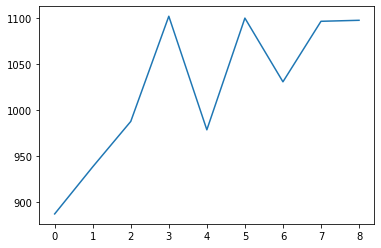

In [ ]:
#plot: value of hyperparameter (x) vs loss (y)
plt.plot(range(len(hyp)),loss_1)
plt.show()

Upward trend in loss which then stabilises as hyperparameter increases. Note that the jaggedness could be due to the nature of the dataset, with discrete labels. (This dataset is popular for regression anyway and rounded off predictions give good accuracy.) Curve nearly plateaus at a point and does not increase beyond a point.

## 9.d for L2

Varying hyperparameters

In [ ]:
#Runs L2 SGD to collect data on value of hyperparameter vs loss
alp=1/(314*250)
#ep=[200, 350, 500, 750, 1000]
hyp=[0.1,0.25,0.5,1,1.5,2,3,4,5]
loss_2=[]
for c1 in hyp:
  m=SGD_SD_L2(X_train,y_train,alpha=alp,epochs=200,c=c1)
  loss_2.append(loss(X_train,y_train))

In [ ]:
print(loss_2)

[859.1228095144558, 896.3353596352525, 926.8036575891444, 922.0921981880491, 947.9248958468105, 943.3392084432952, 938.5321742489293, 959.4110267446148, 962.3886498960587]


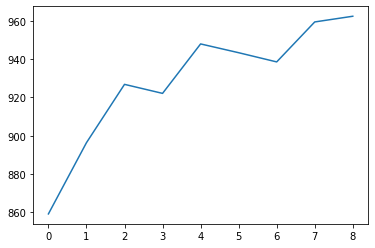

In [ ]:
#Plot: value of hyperparameter (x) vs loss (y)
plt.plot(range(len(hyp)),loss_2)
plt.show()

Upward trend in loss which then stabilises as hyperparameter increases. Much smoother than L1, more gradual and pronounced upward trend. No significant plateau observed for high hyperparameter